# Parte 1

In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

def create_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [2]:
host = "relational.fit.cvut.cz"
user = "guest"
pwd = "relational"
connection = create_connection(host_name = host, user_name =user ,user_password = pwd)

Connection to MySQL DB successful


### 1.	Obtener el nombre, apellido, salario, título y vigencia del mismo para el empleado 12557. Su resultado se debe de ver de la siguiente manera:

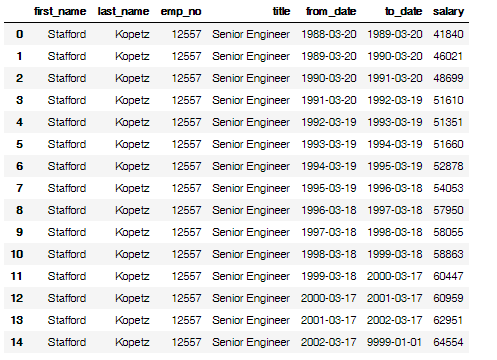

In [3]:
query = """
            SELECT
                A.emp_no,
                A.first_name,
                A.last_name,
                B.title,
                C.from_date,
                C.to_date,
                C.salary
         FROM employee.employees A  
         LEFT JOIN employee.titles B on A.emp_no = B.emp_no 
         LEFT JOIN employee.salaries C on C.emp_no=A.emp_no
         WHERE A.emp_no = 12557
"""
emp_12557 = pd.read_sql(query,connection)
emp_12557

,emp_no,first_name,last_name,title,from_date,to_date,salary
0,12557,Stafford,Kopetz,Senior Engineer,1988-03-20,1989-03-20,41840
1,12557,Stafford,Kopetz,Senior Engineer,1989-03-20,1990-03-20,46021
2,12557,Stafford,Kopetz,Senior Engineer,1990-03-20,1991-03-20,48699
3,12557,Stafford,Kopetz,Senior Engineer,1991-03-20,1992-03-19,51610
4,12557,Stafford,Kopetz,Senior Engineer,1992-03-19,1993-03-19,51351
5,12557,Stafford,Kopetz,Senior Engineer,1993-03-19,1994-03-19,51660
6,12557,Stafford,Kopetz,Senior Engineer,1994-03-19,1995-03-19,52878
7,12557,Stafford,Kopetz,Senior Engineer,1995-03-19,1996-03-18,54053
8,12557,Stafford,Kopetz,Senior Engineer,1996-03-18,1997-03-18,57950
9,12557,Stafford,Kopetz,Senior Engineer,1997-03-18,1998-03-18,58055


### 2.	Encontrar el último departamento en el que trabajó el empleado con la siguiente información del mismo: nombre, apellido, número de empleado, fecha de nacimiento, código de departamento, nombre del departamento, fecha cuando inició su trabajo en ese departamento y la fecha cuando concluyó su trabajo

In [4]:
query = """
        SELECT 
        B.first_name,
        B.last_name,
        B.birth_date,
        C.dept_name,
        A.* 
       FROM (
           SELECT
            dept_no
            ,emp_no
            ,MAX(from_date) Last_dept_date
            ,to_date
            FROM employee.dept_emp
            GROUP BY 1,2,4) A
       LEFT JOIN employee.employees B on A.emp_no = B.emp_no 
       LEFT JOIN employee.departments C ON C.dept_no = A.dept_no
       LIMIT 100
"""
last_dept=pd.read_sql(query,connection)
last_dept

,first_name,last_name,birth_date,dept_name,dept_no,emp_no,Last_dept_date,to_date
0,Cristinel,Bouloucos,1958-07-06,Marketing,d001,10017,1993-08-03,9999-01-01
1,Georgy,Dredge,1956-06-06,Marketing,d001,10055,1992-04-27,1995-07-22
2,Berhard,McFarlin,1954-10-01,Marketing,d001,10058,1988-04-25,9999-01-01
3,Lunjin,Giveon,1952-04-07,Marketing,d001,10108,1999-12-06,2001-10-20
4,Yucel,Auria,1957-03-11,Marketing,d001,10140,1991-03-14,9999-01-01
...,...,...,...,...,...,...,...,...
95,Felicidad,Auria,1964-10-07,Marketing,d001,11744,1989-08-23,2000-01-18
96,Bingning,Etalle,1964-11-11,Marketing,d001,11752,1992-11-10,9999-01-01
97,Giordano,Zaccaria,1961-10-20,Marketing,d001,11776,1986-11-05,1999-11-01
98,Sarita,Birch,1963-11-12,Marketing,d001,11786,1996-02-28,9999-01-01


### 3.	Encontrar el salario máximo de cada empleado utilizando la función Partition By con toda la información del empleado y de su salario

In [5]:
query = """
    SELECT *
    FROM (
        SELECT
            A.emp_no
            ,A.birth_date
            ,A.first_name
            ,A.last_name
            ,A.gender
            ,D.dept_name
            ,B.salary
            ,ROW_NUMBER() OVER (PARTITION BY A.emp_no ORDER BY B.from_date DESC) AS seq
        FROM employee.employees A
        LEFT JOIN employee.salaries B ON B.emp_no = A.emp_no
        LEFT JOIN employee.dept_emp C ON C.emp_no = A.emp_no
        LEFT JOIN employee.departments D ON D.dept_no = C.dept_no
        GROUP BY 1,2,3,4,5,6,7
    ) A
    WHERE seq = 1
    LIMIT 100
"""
pd.read_sql(query,connection)

,emp_no,birth_date,first_name,last_name,gender,dept_name,salary,seq
0,10001,1953-09-02,Georgi,Facello,M,Development,88958,1
1,10002,1964-06-02,Bezalel,Simmel,F,Sales,72527,1
2,10003,1959-12-03,Parto,Bamford,M,Production,43311,1
3,10004,1954-05-01,Chirstian,Koblick,M,Production,74057,1
4,10005,1955-01-21,Kyoichi,Maliniak,M,Human Resources,94692,1
...,...,...,...,...,...,...,...,...
95,10096,1954-09-16,Jayson,Mandell,M,Production,68612,1
96,10097,1952-02-27,Remzi,Waschkowski,M,Research,70161,1
97,10098,1961-09-23,Sreekrishna,Servieres,F,Customer Service,56202,1
98,10099,1956-05-25,Valter,Sullins,F,Sales,98538,1


# Parte 2

Para ver los campos completos utilice la siguiente pagina:
https://sqliteonline.com/

In [6]:
import pandas as pd
import sqlite3
con = sqlite3.connect('sql-murder-mystery.db')
con

In [7]:
query = """
SELECT name 
  FROM sqlite_master
 where type = 'table'
 
 """
pd.read_sql(query, con)

,name
0,crime_scene_report
1,drivers_license
2,person
3,facebook_event_checkin
4,interview
5,get_fit_now_member
6,get_fit_now_check_in
7,income
8,solution


In [8]:
# Buscaremos en la base de datos de la policia de SQL City los crimenes de la fecha 2018-01-15

query='''SELECT *
     FROM crime_scene_report
     WHERE date=20180115 AND city="SQL City"
     '''
pd.read_sql(query,con)

# Podemos ver que el tercer crimen es un homicidio y si vemos la descripción dice que uno de los testigos vive en la ultima casa de Northwestern Dr y la segunda se llama Annabel y vive en la avenida Franlin


,date,type,description,city
0,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot hi...",SQL City
1,20180115,assault,Report Not Found,SQL City
2,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [12]:
# Busquemos al primer testigo
query='''SELECT *,
MAX(address_number) Last_house
FROM person
WHERE address_street_name="Northwestern Dr"     
'''
pd.read_sql(query,con)


,id,name,license_id,address_number,address_street_name,ssn,Last_house
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949,4919


In [13]:
# Busquemos al segundo testigo

query=''' SELECT * FROM person 
WHERE address_street_name="Franklin Ave" AND name="Annabel Miller"
'''
pd.read_sql(query,con)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [16]:
# Con los IDs busquemos las entrevistas

query=''' SELECT *
FROM interview
WHERE person_id = 14887 OR person_id = 16371
'''
pd.read_sql(query,con)

# Podemos ver que el sospechoso va al "Get fit now gym", lo vieron el 9 de enero, su bolsa tiene el número "48z" y es miembro gold, su auto tiene placas "H42W"


,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...
1,16371,"I saw the murder happen, and I recognized the ..."


In [19]:
# Busquemos al sospechoso en la tabla de check in del gimnasio

query=''' SELECT *
FROM get_fit_now_check_in
WHERE check_in_date = 20180109
'''
pd.read_sql(query,con)
# Podemos ver que hay dos personas con id 48Z

,membership_id,check_in_date,check_in_time,check_out_time
0,X0643,20180109,957,1164
1,UK1F2,20180109,344,518
2,XTE42,20180109,486,1124
3,1AE2H,20180109,461,944
4,6LSTG,20180109,399,515
5,7MWHJ,20180109,273,885
6,GE5Q8,20180109,367,959
7,48Z7A,20180109,1600,1730
8,48Z55,20180109,1530,1700
9,90081,20180109,1600,1700


In [20]:
# Vamos a ver si ambos son miembros gold

query=''' SELECT *
FROM get_fit_now_member
WHERE id="48Z55" OR id="48Z7A"
'''
pd.read_sql(query,con)

# Ambos son gold entonces buscaremos sus id en la tabla de licencias para ver las placas


,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold
1,48Z7A,28819,Joe Germuska,20160305,gold


In [22]:
# Buscamos en la tabla de personas los id de licencia con los id de las personas

query='''SELECT * 
FROM person
WHERE id="67318"  OR id="28819"
'''
pd.read_sql(query,con)

,id,name,license_id,address_number,address_street_name,ssn
0,28819,Joe Germuska,173289,111,Fisk Rd,138909730
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [23]:
# Buscamos las licencias para ver las placas

query=''' SELECT * 
FROM drivers_license
WHERE id="173286"  OR id="423327"
'''
pd.read_sql(query,con)
# Podemos ver que el unico con licencia de conducir es Jeremy Bowers y su placa coincide con el testimonio del testigo

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


In [24]:
# Veamos si es el asesino
cursor = con.cursor()
sql = "INSERT INTO solution VALUES (1, 'Jeremy Bowers')"
cursor.execute(sql)
con.commit()
var = pd.read_sql("SELECT value FROM solution", con)
var.iloc[0,0]
# Sí estuvo involucrado en el asesinato

"Congrats, you found the murderer! But wait, there's more... If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villian behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries. Use this same INSERT statement with your new suspect to check your answer."

In [25]:
# Busquemos al verdadero villano detras del crimen

query='''SELECT * 
FROM interview
WHERE person_id = "67318"
'''
pd.read_sql(query,con)
# Podemos ver que lo contrató una mujer de cabello rojo que mide entre 5.5'' y 5.7'', conduce un Tesla model s y asistió a la sinfonía 3 veces en diciembre del 2017


,person_id,transcript
0,67318,I was hired by a woman with a lot of money. I ...


In [27]:
# Busquemos a las villana
query='''
    SELECT *
    FROM (
        SELECT
            A.height,
            A.hair_color,
            A.gender,
            A.car_model,
            B.id,
            B.name,
            C.event_name
        FROM drivers_license A
        LEFT JOIN person B on A.id = B.license_id
        LEFT JOIN facebook_event_checkin C on B.id = C.person_id
        GROUP BY 1,2,3,4,5,6,7
    ) A
    WHERE (A.hair_color="red" AND A.gender="female" AND A.car_model="Model S") AND A.height BETWEEN 65 AND 67
     '''
pd.read_sql(query,con)
# Podemos ver que la unica mujer con las descripciones es Miranda Priestly

,height,hair_color,gender,car_model,id,name,event_name
0,65,red,female,Model S,78881,Red Korb,None
1,66,red,female,Model S,90700,Regina George,None
2,66,red,female,Model S,99716,Miranda Priestly,SQL Symphony Concert


In [28]:
# Confimemos la acusación
cursor = con.cursor()
sql = "INSERT INTO solution VALUES (1, 'Miranda Priestly')"
cursor.execute(sql)
con.commit()
var = pd.read_sql("SELECT value FROM solution", con)
var.iloc[0,0]

'Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!'